# Proyecto 1
*Integrantes:*
- Dayana Gonzalez Vargas
- Juan Manuel Ramirez

## Librerias

In [33]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## Cargar Data Set

In [34]:
df=pd.read_csv("HousingData1").dropna()
df = df.drop('Unnamed: 0',axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  LSTAT    394 non-null    float64
 12  MEDV     394 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 43.1 KB


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observación**
- Notemos que la media de la concentración de oxido de nitrogeno es de 0.5 y la minima concentración es de 0.38, pero la maxima es de 0.87.
- La tasa de crimen tiene una media en esta base de datos de 3.6, donde la mayor tasa de crimen es de 88.
- La media de la cantidad promedio de habitantes por vivienda es de 6, donde el maximo valor es aproximadamente 9.
- Notemos que 6.8% de esta base de datos limita con el Río Charles.
- La variable CHAS más adelante la volvimos categorica, ya que era de tipo flotante, apesar de solo contener 0's y 1's 

## Separar Variable objetivo Y y variables independientes X.

In [42]:
y = df['MEDV']
X = df.drop('MEDV',axis=1)

In [43]:
X['CHAS'] = X['CHAS'].astype('category')
X = pd.get_dummies(X, drop_first=True)
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.25)

## Regresión Lineal

In [45]:
regr = LinearRegression().fit(X_train,y_train)
score = regr.score(X_test,y_test)
print('Score:', score)

Score: 0.6507429929564283


In [46]:
Coef = pd.Series(regr.coef_, index = X.columns)
print(Coef)

CRIM        -0.088930
ZN           0.042307
INDUS        0.053618
NOX        -22.240690
RM           4.702164
AGE         -0.019231
DIS         -1.516295
RAD          0.226467
TAX         -0.012989
PTRATIO     -0.934632
LSTAT       -0.380467
CHAS_1.0     2.947553
dtype: float64


**Observación:**
Notemos que las variables con mayor magnitud son:
- CHAS: Categorica, sobre si limita con el río Charles o no? 
- NOX: Concentración de óxido de nitrogeno
- RM: Cantidad promedio de habitantes por vivienda
- DIS: Media ponderada de la distancia a cinco centros de empleo.

# Ridge - Alpha

In [47]:
alpha = 10**np.linspace(10,-2,100)
ridgecv = RidgeCV(alphas = alpha, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.017475284000076828

In [48]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)             # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred = ridge.predict(X_test)           # Uso del modelo para predecir el conjunto de Testeo
print(pd.Series(ridge.coef_, index = X.columns)) # Imprimir los coeficientes del modelo
print("MSE:",mean_squared_error(y_test, pred))          # Imprimit el error de mínimos cuadrados MSE
print("R2",ridge.score(X_test, y_test)) 

CRIM        -0.081995
ZN           0.038072
INDUS        0.025888
NOX        -20.023212
RM           4.721097
AGE         -0.018775
DIS         -1.397998
RAD          0.178267
TAX         -0.010670
PTRATIO     -0.912631
LSTAT       -0.374502
CHAS_1.0     3.043503
dtype: float64
MSE: 25.028633536807142
R2 0.6503785725924439


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


# Lasso - alpha

In [49]:
lassocv = LassoCV(alphas = alpha, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.01

In [50]:
lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
lasso.fit(X_train, y_train)             # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred = lasso.predict(X_test)           # Uso del modelo para predecir el conjunto de Testeo
print(pd.Series(lasso.coef_, index = X.columns)) # Imprimir los coeficientes del modelo
print("MSE:",mean_squared_error(y_test, pred))          # Imprimit el error de mínimos cuadrados MSE
print("R2",lasso.score(X_test, y_test))

CRIM        -0.029544
ZN           0.016833
INDUS       -0.000000
NOX        -15.234015
RM           4.983249
AGE         -0.006706
DIS         -0.883255
RAD          0.000000
TAX         -0.003079
PTRATIO     -0.876041
LSTAT       -0.377150
CHAS_1.0     2.899183
dtype: float64
MSE: 26.622529092564104
R2 0.6281136719328533


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


**OBSERVACIÓN**

El score no mejoro. El caso de Ridge presenta un resultado interesante debido a que la perdida del score no es realmente significativa.

# Arbol de desición

In [51]:
max_score = [0, 0, 0]
for i in range(3,20):
    for j in range(3,20):
        dec = DecisionTreeRegressor(max_leaf_nodes = i, max_depth = j)
        dec.fit(X_train, y_train)
        sc = dec.score(X_test,y_test)
        if sc > max_score[0]:
            max_score[0] = sc
            max_score[1] = i
            max_score[2] = j
print("El score maximo fue:", max_score[0], "con una cantida de hojas:",max_score[1], "Y una profundidad de:",max_score[2])



El score maximo fue: 0.8448407715753455 con una cantida de hojas: 16 Y una profundidad de: 5


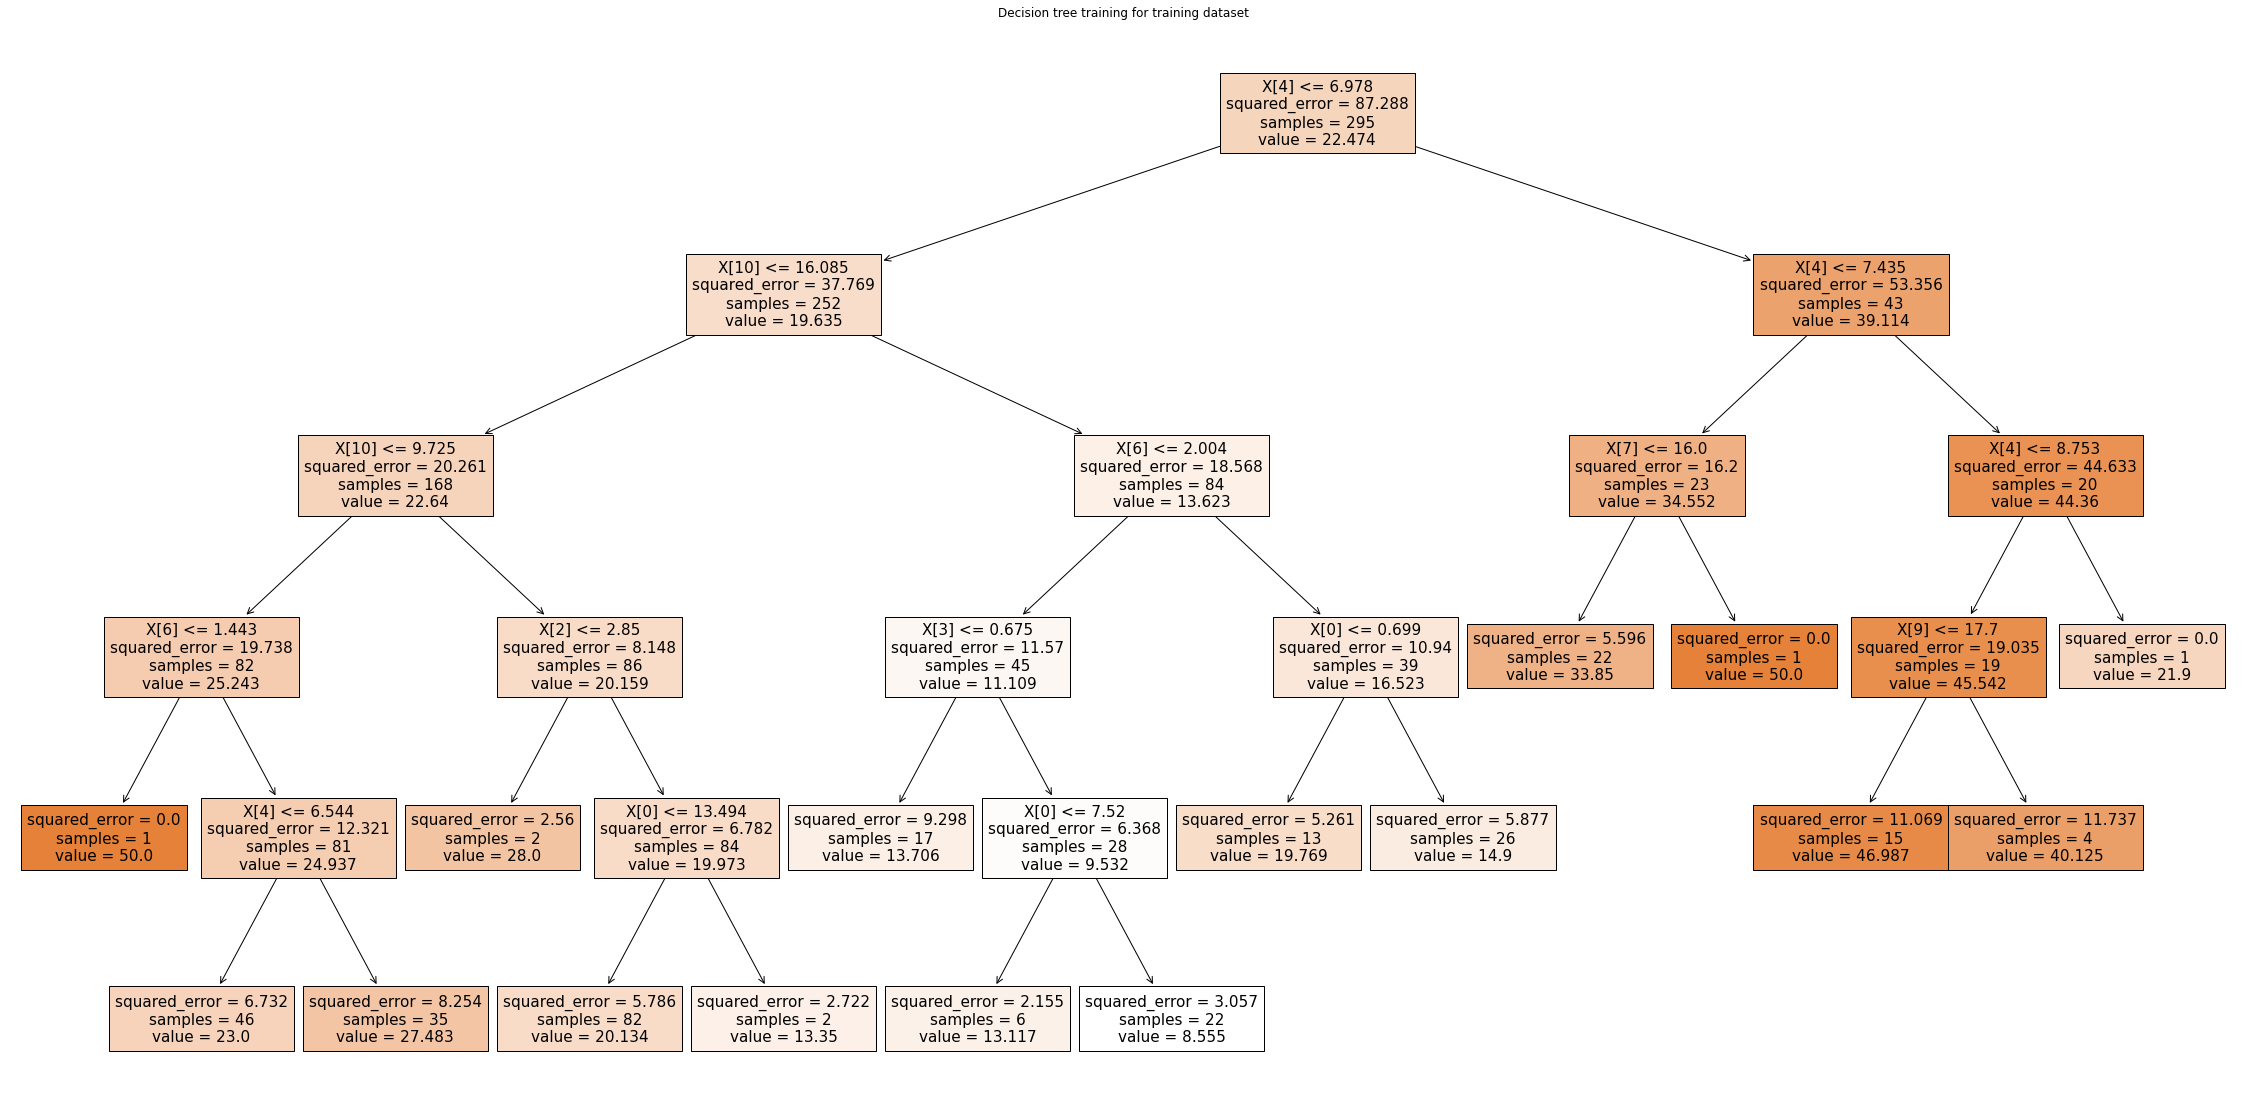

In [52]:
clf = DecisionTreeRegressor(max_leaf_nodes = 16, max_depth = 5)
clf.fit(X_train, y_train)

plt.figure(figsize=(40,20))
plot_tree(clf, filled=True, class_names=True)
plt.title("Decision tree training for training dataset")
plt.show()

Notemos que las variables más relevantes van en el siguiente orden:
- RM: Cantidad promedio de habitantes por vivienda.
- LSTAT: Porcentaje de status bajo de la población.
- AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de.
- TAX: Tasa de impuesto a la propiedad del valor total. 
- PTRATIO: Proporción alumno-docente.
- CRIM: Taza de crimen por cápital
- INDUS: Proporción de comercio no minorista.

## KNN

In [53]:
besto = [0, 0]
for i in range (1,20):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    actual = neigh.score(X_test, y_test)
    if besto[0] < actual:
        besto[0] = actual
        besto[1] = i
print("La cantidad optima de vecinos son", besto[1], "con un score de ", besto[0])

La cantidad optima de vecinos son 3 con un score de  0.6401678623169154


# Conclusiones
**Recordando los scores de cada uno de los modelos: Regresión lineal - 0.6507429929564283, Regresión Ridge - 0.6503785725924439, Regresión Lasso - 0.6281136719328533, Arbol de desición - 0.8448407715753454 y con KNN - 0.6401678623169154.** 
- Notemos que según esta metrica el mejor modelo es usando arboles de desición, podemos ver que  con este modelo las variables relevantes obtenidas fueron distintas (a excepcion de RM). Desde la observacion de las variables se podia apreciar que los arboles daban un mejor resultados al incluir la tasa de criminalidad la cual es bien conocida como una variable relevante para determinar el precio de una casa.

- El peor resultado fue el de Lasso. Se puede observar, comparando con el caso de arboles, que las variables que son mas relevantes tienden a ser eliminadas con mayor facilidad de lo que deberian darse. Al ser este metodo el mas "agresivo" con el proceso de reducir la cantidad de variables es entendible que llegue a un peor resultado.

- En terminos de metodologia se ve que los metodos de regresion lineal y regularizacion pueden fallar por el comportamiento de la dispersion de datos al requerir comportamientos demasiado claros de las variables de manera lineal. Por el lado de knn y los arboles de decision este problema no se presenta, sin embargo la dependencia por la medicion de distancia puede llegar a sesgar este metodo. El caso de arboles de decision da mayor libertad a identificar las variables relevantes al segmentar los datos de manera no lineal e independiente de la "cercania" o magnitud de los datos.